In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_style('ticks')
# sns.set_context("paper", rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 12, 'lines.linewidth': 1.5, 'lines.markersize': 8})
# sns.set_context(rc={'font.size': 10, 'axes.titlesize': 13, 'axes.labelsize': 12, 'lines.linewidth': 1.5, 'lines.markersize': 8})
sns.set_palette('deep')

SMALL_SIZE, MEDIUM_SIZE, LARGE_SIZE, TITLE_SIZE = 8, 10, 12, 14
plt.rc('font', size=LARGE_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=TITLE_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=LARGE_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=LARGE_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=LARGE_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)  # legend fontsize
plt.rc('legend', title_fontsize=MEDIUM_SIZE)  # legend fontsize
plt.rc('figure', titlesize=TITLE_SIZE)  # fontsize of the figure title

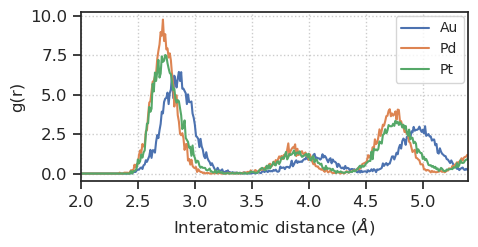

In [54]:
eles = ('Au', 'Pd', 'Pt')
fig, ax = plt.subplots(figsize=(5, 2.2))
for ele in eles:
    dfAll = pd.read_csv(f"{ele}CUS1_od_GR.csv", header=1)
    # dfAll = pd.read_csv(f"od_GR.csv", header=1)
    df = dfAll[dfAll["      Type1"] == "      Total"]
    df.drop(["      Type1", "      Type2"], axis=1, inplace=True)
    df = df.convert_dtypes()
    df.set_index("      Frame", inplace=True)
    df.columns = df.columns.astype(float)
    df = df.transpose()
    df.plot(kind="line", ax=ax, legend=False)
plt.xlim(2, 5.4)
plt.xlabel(r'Interatomic distance ($\AA$)')
plt.ylabel("g(r)")
plt.legend(eles, loc='lower center', title=None, bbox_to_anchor=(0.9, 0.54), ncol=1, frameon=True)
plt.grid(linestyle='dotted')
plt.savefig('RDFsMNP.png', bbox_inches='tight')